question 1


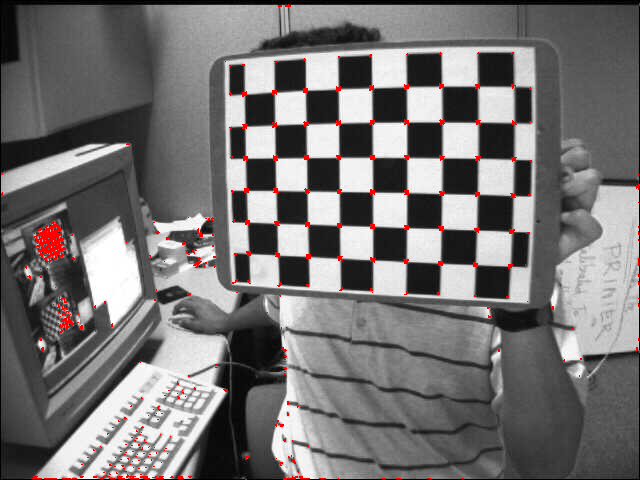

In [1]:
import cv2 as cv
import numpy as np
from IPython import display

# load in image
img = cv.imread("left01.jpg", 1)

kernel = np.ones((3,3),np.float32)/9
img = cv.filter2D(img,-1,kernel)

# type set
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img = np.float32(img)


# question 1

Ix = img.copy()
Iy = img.copy()

# find image demensions
i, j = img.shape

# Ix and Iy
for y in range(i-1):
    for x in range(j-1):
        Ix[y][x] -= Ix[y][x+1]
        Iy[y][x] -= Iy[y+1][x]

Ixy = cv.filter2D((Ix*Iy),-1,kernel)**2 
Ix = cv.filter2D((Ix**2),-1,kernel)
Iy = cv.filter2D((Iy**2),-1,kernel)

Q1D = Ix * Iy - Ixy - 0.05 * (Ix + Iy)**2
Q3 = Q1D.copy()

# Ix and Iy
for y in range(i-1):
    for x in range(j-1):
        if (Q1D[y][x] < 100000):
            Q1D[y][x] = 0

Q1 = cv.imread("left01.jpg", 1)

# Threshold for an optimal value, it may vary depending on the image.
Q1[Q1D>0.0001*Q1D.max()]=[0,0,255]

# save
cv.imwrite("Q1.png", Q1)

# display
print("question 1")
display.Image("q1.png")

question 2


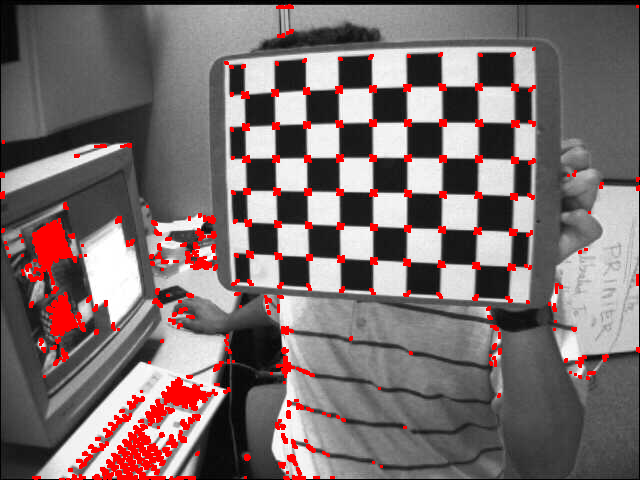

In [2]:
# question 2

dst = img.copy()

dst = cv.cornerHarris(dst,2,3,0.04)

# dilate for marking the corners
dst = cv.dilate(dst, None)


Q2 = cv.imread("left01.jpg", 1)


# Threshold for an optimal value, it may vary depending on the image.
Q2[dst>0.01*dst.max()]=[0,0,255]

# save
cv.imwrite("q2.png", Q2)

# display
print("question 2")
display.Image("q2.png")



# this method of generation is very similar to the method done manually in Q1
# except it is a little more crude as there does not appear to be as much smoothing being done

In [3]:

# question 3
print(Q3[100])

# as can be seen in the print out shown below the edges, flats and corners are all present


[-8.73620020e+03 -2.31124951e+03 -2.28979956e+03 -6.05000019e+00
 -1.80000007e+00 -2.45000052e+00 -3.55555594e-01 -3.55555594e-01
  2.41358072e-01  2.74074197e-01  4.87654507e-02 -2.22221315e-02
  4.87654507e-02  2.19135776e-01  1.47530884e-01  3.39506157e-02
  7.65432119e-02  4.38271612e-02 -2.00000048e-01 -2.00000003e-01
 -2.00000048e-01 -5.00000007e-02 -3.02469134e-02  3.14814821e-02
  6.85185194e-02  4.93827350e-02 -1.29629895e-02 -8.88888985e-02
 -8.88888985e-02  1.28148150e+00  7.67901421e-01 -5.14876461e+00
 -2.90432167e+00  2.93826818e-01  6.88888907e-01 -2.44197583e+00
 -1.25685225e+01 -1.28672867e+01 -4.15802526e+00 -4.51605034e+00
 -1.31635828e+01 -1.77283916e+01 -5.56110859e+00  5.25308490e-01
  1.22839525e-01  1.17901236e-01  3.39506157e-02 -2.22222246e-02
 -1.38888910e-01 -2.00000003e-01 -1.38888910e-01 -2.22222246e-02
 -1.38888910e-01 -2.00000003e-01 -1.38888910e-01 -5.55555616e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -5.55555